# Online Education Student Feedback Analysis


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

## Loading data

In [3]:
data = pd.read_csv('data.csv',names=["Roll Number","Gender","Location","What are the usual causes of stress in your daily online class","What are the usual behavioral effects of stress you've noticed at yourself","What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself","What are the usual PHYSICAL effects of stress you've noticed at yourself","What are the usual COGNITIVE effects of stress you've noticed at yourself","What are the usual SOCIAL effects of stress you've noticed at yourself","What are your personal methods to relieve stress","How stressed do you feel on a daily basis during the academic year","Found that you could not cope with all the things you had to do","When do you feel mostly stressed","How effective has remote learning been for you","How well could you manage time while learning remotely","Do you enjoy learning remotely"])
data.head()

,Roll Number,Gender,Location,What are the usual causes of stress in your daily online class,What are the usual behavioral effects of stress you've noticed at yourself,What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself,What are the usual PHYSICAL effects of stress you've noticed at yourself,What are the usual COGNITIVE effects of stress you've noticed at yourself,What are the usual SOCIAL effects of stress you've noticed at yourself,What are your personal methods to relieve stress,How stressed do you feel on a daily basis during the academic year,Found that you could not cope with all the things you had to do,When do you feel mostly stressed,How effective has remote learning been for you,How well could you manage time while learning remotely,Do you enjoy learning remotely
0,19234,Female,Urban,Environmental Background Noise,Change in sleep patterns,"Feeling isolated, lost, lonely or abandoned, m...",Eye problem due to online class,No cognitive effect,Difficulty engaging in mutual problem solving,Talking with someone,Less Stressed,Almost Never,Assignment submision deadline,Moderately effective,Average,"Yes, but I would like to change a few things"
1,180330129,Female,Urban,Environmental Background Noise,Difficulty communicating,"Feeling isolated, lost, lonely or abandoned, m...",Headaches,Difficulty Concentrating,Difficulty listening,Social Media,highly stressed,Never,Online class during evening time,Not at all effective,Very Bad,Never
2,190330210,Male,Urban,Feeling no stress,"Inability to rest, relax or let down","Feeling overwhelmed, helpless or hopeless",Headaches,No cognitive effect,Withdrawing or isolating from people,Sports / Exercise,Less Stressed,Almost Never,Assignment submision deadline,Not at all effective,Good,"Yes, but I would like to change a few things"
3,2010080002,Male,Urban,Health Issue,Decreased efficiency and effectiveness,"Feeling overwhelmed, helpless or hopeless",Eye problem due to online class,"Difficulty calculating, setting priorities or ...",Difficulty listening,Talking with someone,Average Stressed,Sometimes,Online class during evening time,Moderately effective,Average,"No, there are quite a few challenges"
4,2010030380,Male,Urban,Family Issue,Change in sleep patterns,"Feeling overwhelmed, helpless or hopeless","Digestion Problem, Upset stomach, nausea, diar...","Difficulty calculating, setting priorities or ...",Difficulty engaging in mutual problem solving,Sports / Exercise,highly stressed,Fairly Often,Assignment submision deadline,Slightly effective,Good,"No, there are quite a few challenges"


In [4]:
data.shape

(499, 16)

In [7]:
data['Gender'].value_counts()

Male      343
Female    156
Name: Gender, dtype: int64

In [5]:
data['Location'].value_counts()

Urban    411
Rural     88
Name: Location, dtype: int64

In [8]:
def status(d):
    print("Description")
    print("#"*50)
    print(d.describe())
    print("#"*100)
    print("Value Counts")
    print("#"*50)
    lt = d.value_counts()
    print(lt)
    lt.plot(kind='pie')

# Statistics:
## What are the usual causes of stress in your daily online class?

Description
##################################################
count                   499
unique                    4
top       Feeling no stress
freq                    204
Name: What are the usual causes of stress in your daily online class, dtype: object
####################################################################################################
Value Counts
##################################################
Feeling no stress                 204
Health Issue                      139
Environmental Background Noise    114
Family Issue                       42
Name: What are the usual causes of stress in your daily online class, dtype: int64


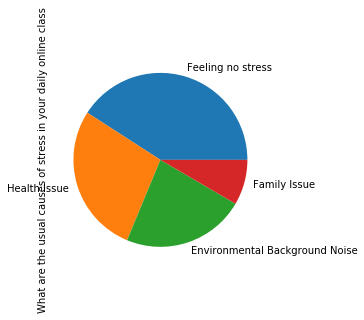

In [9]:
status(data['What are the usual causes of stress in your daily online class'])

## What are the usual behavioral effects of stress you've noticed at yourself?

Description
##################################################
count                                      499
unique                                       6
top       Inability to rest, relax or let down
freq                                       172
Name: What are the usual behavioral effects of stress you've noticed at yourself, dtype: object
####################################################################################################
Value Counts
##################################################
Inability to rest, relax or let down      172
No changes in behaviour                   101
Decreased efficiency and effectiveness     90
Change in sleep patterns                   54
Change in activity levels                  42
Difficulty communicating                   40
Name: What are the usual behavioral effects of stress you've noticed at yourself, dtype: int64


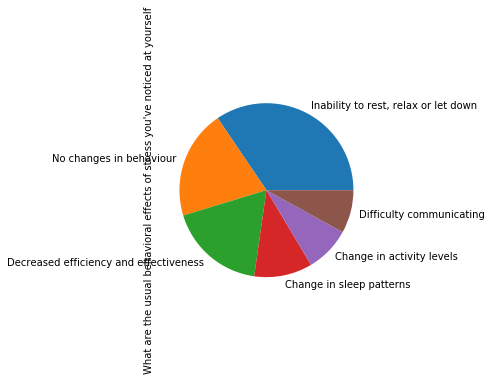

In [10]:
status(data["What are the usual behavioral effects of stress you've noticed at yourself"])

## What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself?

Description
##################################################
count                                       499
unique                                        5
top       No psychological and emotional effect
freq                                        202
Name: What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself, dtype: object
####################################################################################################
Value Counts
##################################################
No psychological and emotional effect                           202
Feeling overwhelmed, helpless or hopeless                       100
Feeling isolated, lost, lonely or abandoned, missing friends     97
Sadness, moodiness, grief or depression                          71
Anxlety or fear                                                  29
Name: What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself, dtype: int64


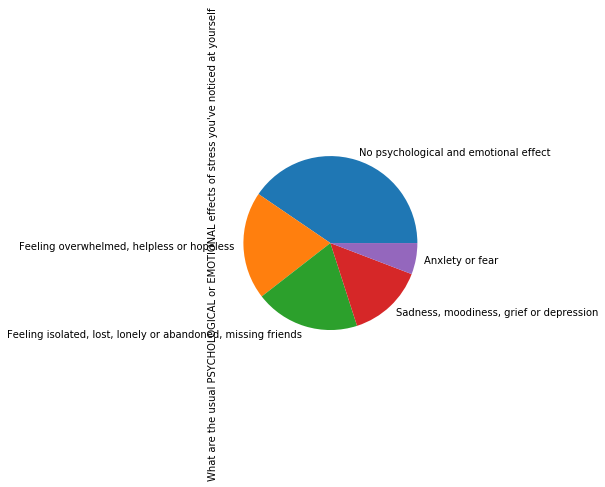

In [11]:
status(data["What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself"])

## What are the usual PHYSICAL effects of stress you've noticed at yourself?

Description
##################################################
count                                 499
unique                                  5
top       Eye problem due to online class
freq                                  167
Name: What are the usual PHYSICAL effects of stress you've noticed at yourself, dtype: object
####################################################################################################
Value Counts
##################################################
Eye problem due to online class                       167
Headaches                                             158
No physical effect                                    148
Tremors or muscle twitching                            15
Digestion Problem, Upset stomach, nausea, diarrhea     11
Name: What are the usual PHYSICAL effects of stress you've noticed at yourself, dtype: int64


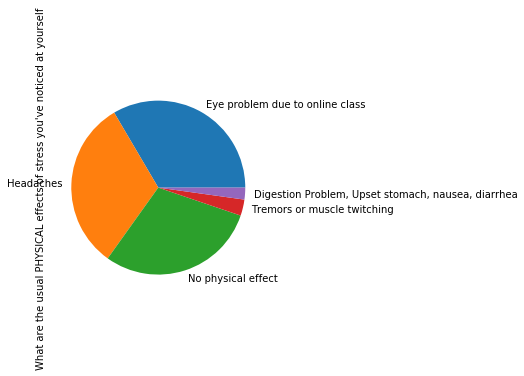

In [12]:
status(data["What are the usual PHYSICAL effects of stress you've noticed at yourself"])

## What are the usual COGNITIVE effects of stress you've noticed at yourself?

Description
##################################################
count                     499
unique                      5
top       No cognitive effect
freq                      146
Name: What are the usual COGNITIVE effects of stress you've noticed at yourself, dtype: object
####################################################################################################
Value Counts
##################################################
No cognitive effect                                                                    146
Difficulty Concentrating                                                               137
Difficulty calculating, setting priorities or making decisions due to huge workload    133
Slowness in thinking, analyzing, or comprehending                                       52
Confusion                                                                               31
Name: What are the usual COGNITIVE effects of stress you've noticed at yourself, dtype: int64


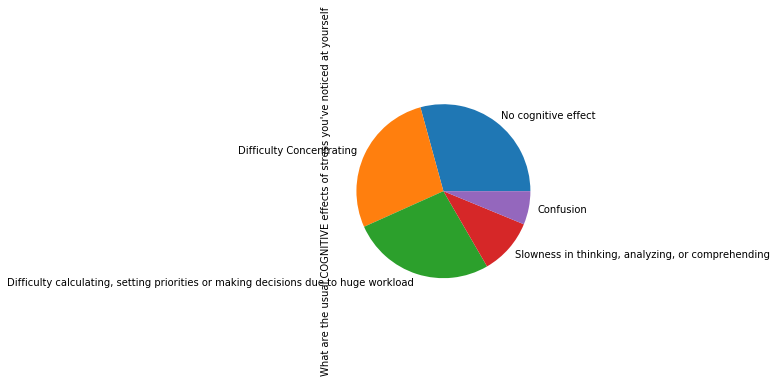

In [13]:
status(data["What are the usual COGNITIVE effects of stress you've noticed at yourself"])

## What are the usual SOCIAL effects of stress you've noticed at yourself?

Description
##################################################
count                  499
unique                   5
top       No social effect
freq                   180
Name: What are the usual SOCIAL effects of stress you've noticed at yourself, dtype: object
####################################################################################################
Value Counts
##################################################
No social effect                                 180
Difficulty listening                              93
Difficulty engaging in mutual problem solving     90
Withdrawing or isolating from people              85
Difficulty sharing ideas                          51
Name: What are the usual SOCIAL effects of stress you've noticed at yourself, dtype: int64


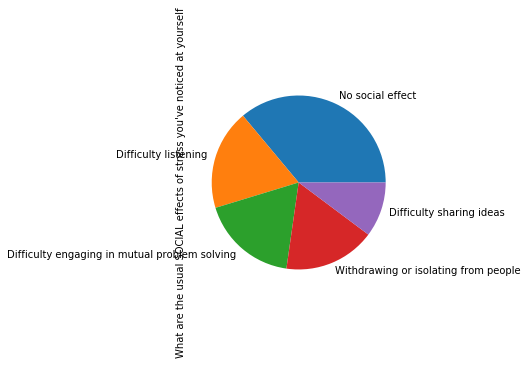

In [13]:
status(data["What are the usual SOCIAL effects of stress you've noticed at yourself"])

## What are your personal methods to relieve stress?

Description
##################################################
count                   488
unique                    6
top       Sports / Exercise
freq                    167
Name: What are your personal methods to relieve stress, dtype: object
####################################################################################################
Value Counts
##################################################
Sports / Exercise       167
Sleeping                143
Talking with someone     91
Computer Games           43
Social Media             30
Eating                   14
Name: What are your personal methods to relieve stress, dtype: int64


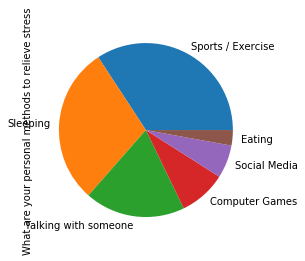

In [14]:
status(data["What are your personal methods to relieve stress"])

## How stressed do you feel on a daily basis during the academic year?

Description
##################################################
count                  499
unique                   4
top       Average Stressed
freq                   195
Name: How stressed do you feel on a daily basis during the academic year, dtype: object
####################################################################################################
Value Counts
##################################################
Average Stressed       195
highly stressed        189
Less Stressed           79
Not Stressed at All     36
Name: How stressed do you feel on a daily basis during the academic year, dtype: int64


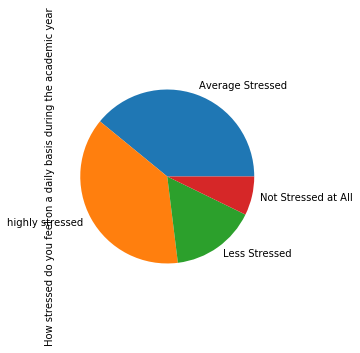

In [15]:
status(data["How stressed do you feel on a daily basis during the academic year"])

## Found that you could not cope with all the things you had to do

Description
##################################################
count           499
unique            5
top       Sometimes
freq            247
Name: Found that you could not cope with all the things you had to do, dtype: object
####################################################################################################
Value Counts
##################################################
Sometimes       247
Fairly Often     76
Very Often       72
Never            64
Almost Never     40
Name: Found that you could not cope with all the things you had to do, dtype: int64


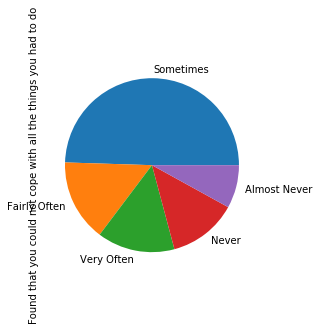

In [16]:
status(data["Found that you could not cope with all the things you had to do"])

## When do you feel mostly stressed?

Description
##################################################
count                                  499
unique                                   5
top       Online class during evening time
freq                                   192
Name: When do you feel mostly stressed, dtype: object
####################################################################################################
Value Counts
##################################################
Online class during evening time    192
Assignment submision deadline       165
Online class during day time         75
Never feel stressed                  45
Online Examination time              22
Name: When do you feel mostly stressed, dtype: int64


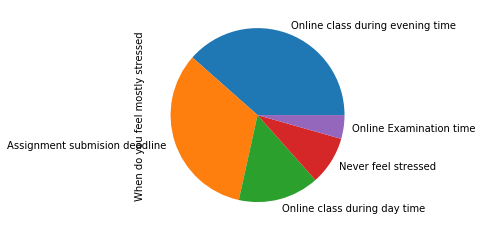

In [17]:
status(data["When do you feel mostly stressed"])

## How effective has remote learning been for you?

Description
##################################################
count                      499
unique                       5
top       Moderately effective
freq                       185
Name: How effective has remote learning been for you, dtype: object
####################################################################################################
Value Counts
##################################################
Moderately effective    185
Slightly effective      123
Not at all effective    105
Very effective           52
Extremely effective      34
Name: How effective has remote learning been for you, dtype: int64


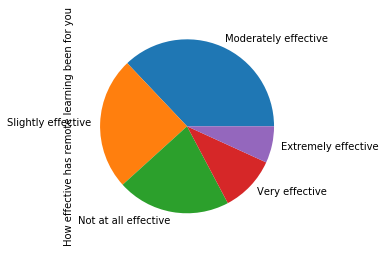

In [18]:
status(data["How effective has remote learning been for you"])

## How well could you manage time while learning remotely?

Description
##################################################
count         495
unique          5
top       Average
freq          193
Name: How well could you manage time while learning remotely, dtype: object
####################################################################################################
Value Counts
##################################################
Average      193
Good         153
Very Bad      54
Bad           48
Very good     47
Name: How well could you manage time while learning remotely, dtype: int64


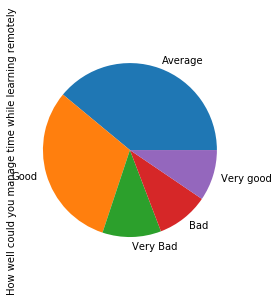

In [19]:
status(data["How well could you manage time while learning remotely"])

## Do you enjoy learning remotely?

Description
##################################################
count                                              496
unique                                               4
top       Yes, but I would like to change a few things
freq                                               206
Name: Do you enjoy learning remotely, dtype: object
####################################################################################################
Value Counts
##################################################
Yes, but I would like to change a few things    206
Yes, absolutely                                 115
No, there are quite a few challenges            104
Never                                            71
Name: Do you enjoy learning remotely, dtype: int64


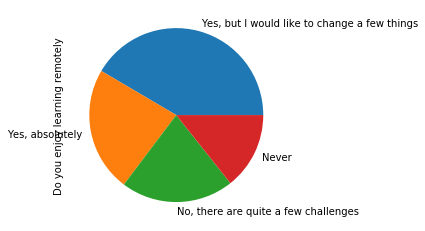

In [20]:
status(data["Do you enjoy learning remotely"])

In [21]:
data.iloc[:,2:].to_csv('student_data.csv',index=False)

In [22]:
final_data = pd.read_csv('student_data.csv')
final_data[:5]

,Location,What are the usual causes of stress in your daily online class,What are the usual behavioral effects of stress you've noticed at yourself,What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself,What are the usual PHYSICAL effects of stress you've noticed at yourself,What are the usual COGNITIVE effects of stress you've noticed at yourself,What are the usual SOCIAL effects of stress you've noticed at yourself,What are your personal methods to relieve stress,How stressed do you feel on a daily basis during the academic year,Found that you could not cope with all the things you had to do,When do you feel mostly stressed,How effective has remote learning been for you,How well could you manage time while learning remotely,Do you enjoy learning remotely
0,Urban,Environmental Background Noise,Change in sleep patterns,"Feeling isolated, lost, lonely or abandoned, m...",Eye problem due to online class,No cognitive effect,Difficulty engaging in mutual problem solving,Talking with someone,Less Stressed,Almost Never,Assignment submision deadline,Moderately effective,Average,"Yes, but I would like to change a few things"
1,Urban,Environmental Background Noise,Difficulty communicating,"Feeling isolated, lost, lonely or abandoned, m...",Headaches,Difficulty Concentrating,Difficulty listening,Social Media,highly stressed,Never,Online class during evening time,Not at all effective,Very Bad,Never
2,Urban,Feeling no stress,"Inability to rest, relax or let down","Feeling overwhelmed, helpless or hopeless",Headaches,No cognitive effect,Withdrawing or isolating from people,Sports / Exercise,Less Stressed,Almost Never,Assignment submision deadline,Not at all effective,Good,"Yes, but I would like to change a few things"
3,Urban,Health Issue,Decreased efficiency and effectiveness,"Feeling overwhelmed, helpless or hopeless",Eye problem due to online class,"Difficulty calculating, setting priorities or ...",Difficulty listening,Talking with someone,Average Stressed,Sometimes,Online class during evening time,Moderately effective,Average,"No, there are quite a few challenges"
4,Urban,Family Issue,Change in sleep patterns,"Feeling overwhelmed, helpless or hopeless","Digestion Problem, Upset stomach, nausea, diar...","Difficulty calculating, setting priorities or ...",Difficulty engaging in mutual problem solving,Sports / Exercise,highly stressed,Fairly Often,Assignment submision deadline,Slightly effective,Good,"No, there are quite a few challenges"


# Text Preprocessing

In [23]:
raw_dataset = pd.read_csv('student_data.csv')
indexes = []
for index in raw_dataset:
    indexes.append(index)
print(indexes)

['Location', 'What are the usual causes of stress in your daily online class', "What are the usual behavioral effects of stress you've noticed at yourself", "What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself", "What are the usual PHYSICAL effects of stress you've noticed at yourself", "What are the usual COGNITIVE effects of stress you've noticed at yourself", "What are the usual SOCIAL effects of stress you've noticed at yourself", 'What are your personal methods to relieve stress', 'How stressed do you feel on a daily basis during the academic year', 'Found that you could not cope with all the things you had to do', 'When do you feel mostly stressed', 'How effective has remote learning been for you', 'How well could you manage time while learning remotely', 'Do you enjoy learning remotely']


## Removing special charecter and data cleaning

In [24]:
from tqdm import tqdm
from bs4 import BeautifulSoup
dataset = pd.DataFrame()

In [25]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:
def clean(data):
    preprocessed_data = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data):
        if type(sentance)==str:
            sentance = re.sub(r" / "," ", sentance)
            sentance = decontracted(sentance)
            sentance = re.sub("\S*\d\S*", "", sentance).strip()
            sentance = re.sub('[^A-Za-z]+'," ", sentance)
            sentance = ' '.join(e.lower() for e in sentance.split())
        else:
            sentance=" "
        preprocessed_data.append(sentance.strip())
    return preprocessed_data

In [27]:
for index in raw_dataset:
    column = clean(raw_dataset[index])
    dataset[index] = column
dataset

100%|██████████| 499/499 [00:00<00:00, 50055.19it/s]


,Location,What are the usual causes of stress in your daily online class,What are the usual behavioral effects of stress you've noticed at yourself,What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself,What are the usual PHYSICAL effects of stress you've noticed at yourself,What are the usual COGNITIVE effects of stress you've noticed at yourself,What are the usual SOCIAL effects of stress you've noticed at yourself,What are your personal methods to relieve stress,How stressed do you feel on a daily basis during the academic year,Found that you could not cope with all the things you had to do,When do you feel mostly stressed,How effective has remote learning been for you,How well could you manage time while learning remotely,Do you enjoy learning remotely
0,urban,environmental background noise,change in sleep patterns,feeling isolated lost lonely or abandoned miss...,eye problem due to online class,no cognitive effect,difficulty engaging in mutual problem solving,talking with someone,less stressed,almost never,assignment submision deadline,moderately effective,average,yes but i would like to change a few things
1,urban,environmental background noise,difficulty communicating,feeling isolated lost lonely or abandoned miss...,headaches,difficulty concentrating,difficulty listening,social media,highly stressed,never,online class during evening time,not at all effective,very bad,never
2,urban,feeling no stress,inability to rest relax or let down,feeling overwhelmed helpless or hopeless,headaches,no cognitive effect,withdrawing or isolating from people,sports exercise,less stressed,almost never,assignment submision deadline,not at all effective,good,yes but i would like to change a few things
3,urban,health issue,decreased efficiency and effectiveness,feeling overwhelmed helpless or hopeless,eye problem due to online class,difficulty calculating setting priorities or m...,difficulty listening,talking with someone,average stressed,sometimes,online class during evening time,moderately effective,average,no there are quite a few challenges
4,urban,family issue,change in sleep patterns,feeling overwhelmed helpless or hopeless,digestion problem upset stomach nausea diarrhea,difficulty calculating setting priorities or m...,difficulty engaging in mutual problem solving,sports exercise,highly stressed,fairly often,assignment submision deadline,slightly effective,good,no there are quite a few challenges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,urban,feeling no stress,inability to rest relax or let down,sadness moodiness grief or depression,headaches,difficulty calculating setting priorities or m...,no social effect,sleeping,highly stressed,fairly often,online class during evening time,moderately effective,average,yes but i would like to change a few things
495,rural,environmental background noise,difficulty communicating,feeling overwhelmed helpless or hopeless,eye problem due to online class,difficulty concentrating,difficulty listening,sports exercise,highly stressed,sometimes,online class during evening time,slightly effective,bad,no there are quite a few challenges
496,urban,feeling no stress,no changes in behaviour,no psychological and emotional effect,no physical effect,no cognitive effect,no social effect,sleeping,less stressed,sometimes,online class during evening time,moderately effective,good,yes but i would like to change a few things
497,urban,health issue,inability to rest relax or let down,feeling overwhelmed helpless or hopeless,headaches,confusion,difficulty engaging in mutual problem solving,sleeping,highly stressed,very often,online class during evening time,moderately effective,average,yes but i would like to change a few things


# Text Proccessing

In [28]:
def sentanceToVector(data):
    wordlist = {}
    for sen in tqdm(data):
        for word in  sen.split():
            if word in wordlist.keys():
                wordlist[word] = wordlist[word]+1
            else:
                wordlist[word] = 1
    sorted_list = dict(sorted(wordlist.items(), key=lambda x: x[1],reverse=True))
    print(len(wordlist))
    print(str(sorted_list))
    vector = []
    for sen in tqdm(data):
        words = set(sen.split())
        code = '0'
        for word in sorted_list:
            if word in words:
                code = code + '1'
            else:
                code = code + '0'
        vector.append(int(code,2))
    return vector     

In [29]:
final_dataset = pd.DataFrame()
final_dataset['Location'] = dataset['Location']

In [30]:
titles = list(e for e in dataset)
for title in titles[1:]:
    print("="*50)
    print(title)
    vector = sentanceToVector(dataset[title])
    final_dataset[title] = vector

What are the usual causes of stress in your daily online class


100%|██████████| 499/499 [00:00<00:00, 499989.89it/s]


9
{'feeling': 204, 'no': 204, 'stress': 204, 'issue': 181, 'health': 139, 'environmental': 114, 'background': 114, 'noise': 114, 'family': 42}


100%|██████████| 499/499 [00:00<00:00, 165739.44it/s]


What are the usual behavioral effects of stress you've noticed at yourself


100%|██████████| 499/499 [00:00<00:00, 252133.20it/s]


22
{'in': 197, 'inability': 172, 'to': 172, 'rest': 172, 'relax': 172, 'or': 172, 'let': 172, 'down': 172, 'no': 101, 'changes': 101, 'behaviour': 101, 'change': 96, 'decreased': 90, 'efficiency': 90, 'and': 90, 'effectiveness': 90, 'sleep': 54, 'patterns': 54, 'activity': 42, 'levels': 42, 'difficulty': 40, 'communicating': 40}


100%|██████████| 499/499 [00:00<00:00, 164722.00it/s]


What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself


100%|██████████| 499/499 [00:00<00:00, 167249.30it/s]


22
{'or': 297, 'no': 202, 'psychological': 202, 'and': 202, 'emotional': 202, 'effect': 202, 'feeling': 197, 'overwhelmed': 100, 'helpless': 100, 'hopeless': 100, 'isolated': 97, 'lost': 97, 'lonely': 97, 'abandoned': 97, 'missing': 97, 'friends': 97, 'sadness': 71, 'moodiness': 71, 'grief': 71, 'depression': 71, 'anxlety': 29, 'fear': 29}


100%|██████████| 499/499 [00:00<00:00, 250293.91it/s]


What are the usual PHYSICAL effects of stress you've noticed at yourself


100%|██████████| 499/499 [00:00<00:00, 500707.58it/s]


19
{'problem': 178, 'eye': 167, 'due': 167, 'to': 167, 'online': 167, 'class': 167, 'headaches': 158, 'no': 148, 'physical': 148, 'effect': 148, 'tremors': 15, 'or': 15, 'muscle': 15, 'twitching': 15, 'digestion': 11, 'upset': 11, 'stomach': 11, 'nausea': 11, 'diarrhea': 11}


100%|██████████| 499/499 [00:00<00:00, 251951.09it/s]


What are the usual COGNITIVE effects of stress you've noticed at yourself


100%|██████████| 499/499 [00:00<00:00, 500707.58it/s]


21
{'difficulty': 270, 'or': 185, 'no': 146, 'cognitive': 146, 'effect': 146, 'concentrating': 137, 'calculating': 133, 'setting': 133, 'priorities': 133, 'making': 133, 'decisions': 133, 'due': 133, 'to': 133, 'huge': 133, 'workload': 133, 'slowness': 52, 'in': 52, 'thinking': 52, 'analyzing': 52, 'comprehending': 52, 'confusion': 31}


100%|██████████| 499/499 [00:00<00:00, 125064.70it/s]


What are the usual SOCIAL effects of stress you've noticed at yourself


100%|██████████| 499/499 [00:00<00:00, 499631.82it/s]


17
{'difficulty': 234, 'no': 180, 'social': 180, 'effect': 180, 'listening': 93, 'engaging': 90, 'in': 90, 'mutual': 90, 'problem': 90, 'solving': 90, 'withdrawing': 85, 'or': 85, 'isolating': 85, 'from': 85, 'people': 85, 'sharing': 51, 'ideas': 51}


100%|██████████| 499/499 [00:00<00:00, 250234.06it/s]


What are your personal methods to relieve stress


100%|██████████| 499/499 [00:00<?, ?it/s]


11
{'sports': 167, 'exercise': 167, 'sleeping': 143, 'talking': 91, 'with': 91, 'someone': 91, 'computer': 43, 'games': 43, 'social': 30, 'media': 30, 'eating': 14}


100%|██████████| 499/499 [00:00<00:00, 478281.01it/s]


How stressed do you feel on a daily basis during the academic year


100%|██████████| 499/499 [00:00<00:00, 250984.25it/s]


7
{'stressed': 499, 'average': 195, 'highly': 189, 'less': 79, 'not': 36, 'at': 36, 'all': 36}


100%|██████████| 499/499 [00:00<00:00, 499751.12it/s]


Found that you could not cope with all the things you had to do


100%|██████████| 499/499 [00:00<00:00, 251829.83it/s]


6
{'sometimes': 247, 'often': 148, 'never': 104, 'fairly': 76, 'very': 72, 'almost': 40}


100%|██████████| 499/499 [00:00<00:00, 249577.59it/s]


When do you feel mostly stressed


100%|██████████| 499/499 [00:00<00:00, 503720.26it/s]


13
{'online': 289, 'time': 289, 'class': 267, 'during': 267, 'evening': 192, 'assignment': 165, 'submision': 165, 'deadline': 165, 'day': 75, 'never': 45, 'feel': 45, 'stressed': 45, 'examination': 22}


100%|██████████| 499/499 [00:00<00:00, 249935.24it/s]


How effective has remote learning been for you


100%|██████████| 499/499 [00:00<00:00, 497257.71it/s]


8
{'effective': 499, 'moderately': 185, 'slightly': 123, 'not': 105, 'at': 105, 'all': 105, 'very': 52, 'extremely': 34}


100%|██████████| 499/499 [00:00<00:00, 166782.83it/s]


How well could you manage time while learning remotely


100%|██████████| 499/499 [00:00<00:00, 498917.21it/s]


4
{'good': 200, 'average': 193, 'bad': 102, 'very': 101}


100%|██████████| 499/499 [00:00<00:00, 249994.95it/s]


Do you enjoy learning remotely


100%|██████████| 499/499 [00:00<00:00, 256993.82it/s]


17
{'yes': 321, 'a': 310, 'few': 310, 'but': 206, 'i': 206, 'would': 206, 'like': 206, 'to': 206, 'change': 206, 'things': 206, 'absolutely': 115, 'no': 104, 'there': 104, 'are': 104, 'quite': 104, 'challenges': 104, 'never': 71}


100%|██████████| 499/499 [00:00<00:00, 250144.34it/s]


In [31]:
final_dataset

,Location,What are the usual causes of stress in your daily online class,What are the usual behavioral effects of stress you've noticed at yourself,What are the usual PSYCHOLOGICAL or EMOTIONAL effects of stress you've noticed at yourself,What are the usual PHYSICAL effects of stress you've noticed at yourself,What are the usual COGNITIVE effects of stress you've noticed at yourself,What are the usual SOCIAL effects of stress you've noticed at yourself,What are your personal methods to relieve stress,How stressed do you feel on a daily basis during the academic year,Found that you could not cope with all the things you had to do,When do you feel mostly stressed,How effective has remote learning been for you,How well could you manage time while learning remotely,Do you enjoy learning remotely
0,urban,14,2098224,2133952,516096,458752,69504,224,72,9,224,192,4,130944
1,urban,14,3,2133952,4096,1081344,69632,6,80,8,7936,156,3,1
2,urban,448,2080768,2158592,4096,458752,124,1536,72,9,224,156,8,130944
3,urban,48,960,2158592,516096,1605568,69632,224,96,32,7936,192,4,49214
4,urban,33,2098224,2158592,262175,1605568,69504,1536,80,20,224,160,8,49214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,urban,448,2080768,2097212,4096,1605568,57344,256,80,20,7936,192,4,130944
495,rural,14,3,2158592,516096,1081344,69632,1536,80,32,7936,160,2,49214
496,urban,448,2111488,2031616,3584,458752,57344,256,72,32,7936,192,8,130944
497,urban,48,2080768,2158592,4096,1,69504,256,80,18,7936,192,4,130944


In [32]:
final_dataset.to_csv('final_dataset.csv',index = False)

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(final_dataset[1],final_dataset[2],final_dataset[3],final_dataset[4],final_dataset[5],final_dataset[6],final_dataset[7],final_dataset[8],final_dataset[9],final_dataset[10],final_dataset[11],final_dataset[12],final_dataset[13],s=15,color='grey')
plt.title('Dataset',fontsize=20)
#plt.xlabel('Feature 1',fontsize=14)
#plt.ylabel('Feature 2',fontsize=14)
plt.show()

KeyError: 1

<Figure size 720x720 with 0 Axes>